In [1]:
# *************** elaboration des données  *************************************************
#
# 1)  Charger les formulaires nécessaires à la manipulation des données 
# 2)  Téléchargez le fichier 'WeatherAUS_Clean.csv' sous le nom 'df'
# 3)  Vérifier les valeurs nulles 'missingno' librerie
# 4)  Drop le ligne Nan pour RainToday et Rain Tomorrow
# 5)  Drop la col WindGustDir
# 5)  Replacer le nan 
# 6)  Première statistique des données
#
# *************** elaboration des graphiques *************************************************
#
# 7)  Diagrammes en boîte correspondants aux variables explicatives
# 8)  Ajouter une colonne identifiant la région pour les différentes stations météorologiques
# 9)  Nous copions df en tant que 'dfxlocreg' pour représenter 
#     graphiquement les données selon les lieux et leurs régions.
# 10) Costruction du 'Rainfall distribution in each location' graphique
# 11) Costruction de graphiques détaillés par ville et par area
# 12) Costruction de graphiques détaillés par annè et par mois
# 13) Costruction de graphiques countplot par RainToday et RainTomorrow
# 14) Costruction de graphiques détaillés par Evaporation et Sunshine en top 5 ville par mois
# 15) Costruction de graphique Pressure3pm Vs Pressure9am


In [2]:
import pandas as pd
import missingno as msno
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('WeatherAUS_Clean.csv', sep=';')
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,year,month,day,week,WindGustDirStr
0,2009-01-01,Albury,11.3,26.5,0.0,9.8,12.9,WNW,56.0,46.0,26.0,1004.5,1003.2,No,No,2009,1,1,1,WNW
1,2009-01-02,Albury,9.6,23.9,0.0,11.0,5.9,W,41.0,44.0,22.0,1014.4,1013.1,No,No,2009,1,2,1,W
2,2009-01-03,Albury,10.5,28.8,0.0,9.0,0.5,SSE,26.0,43.0,22.0,1018.7,1014.8,No,No,2009,1,3,1,SSE
3,2009-01-04,Albury,12.3,34.6,0.0,5.4,11.3,WNW,37.0,41.0,12.0,1015.1,1010.3,No,No,2009,1,4,1,WNW
4,2009-01-05,Albury,12.9,35.8,0.0,10.0,12.2,WNW,41.0,41.0,9.0,1012.6,1009.2,No,No,2009,1,5,2,WNW


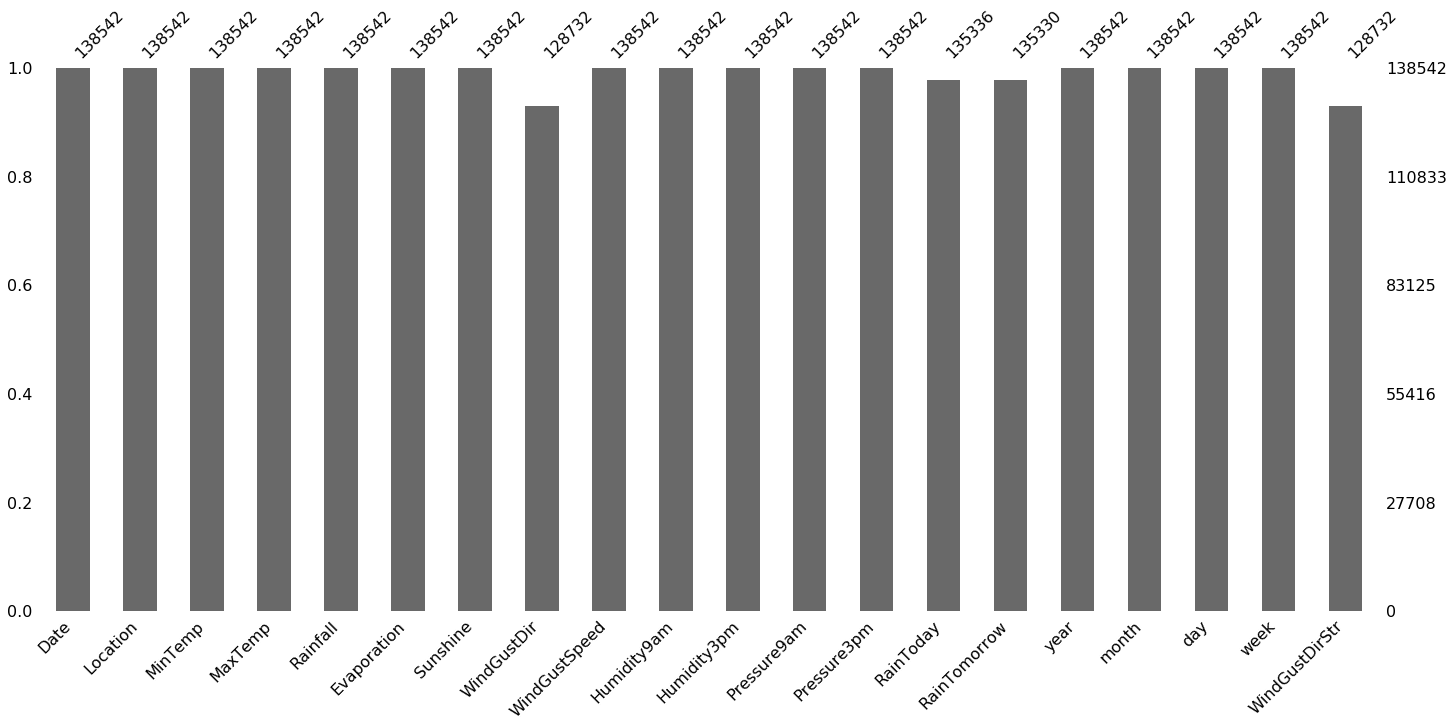

In [4]:
# Vérifier les valeurs nulles ****
# Le but de cette étape est de trouver 
# les colonnes caractérisées par un nombre faible ou élevé
# d'éléments nuls

msno.bar(df);

# colonnes caractérisées par Nan:
# WindGustDir  == WindGustDirStr  -> Nan = 9382
# RainTomorrow --------------------> Nan = 1373
# RainToday    --------------------> Nan = 1367



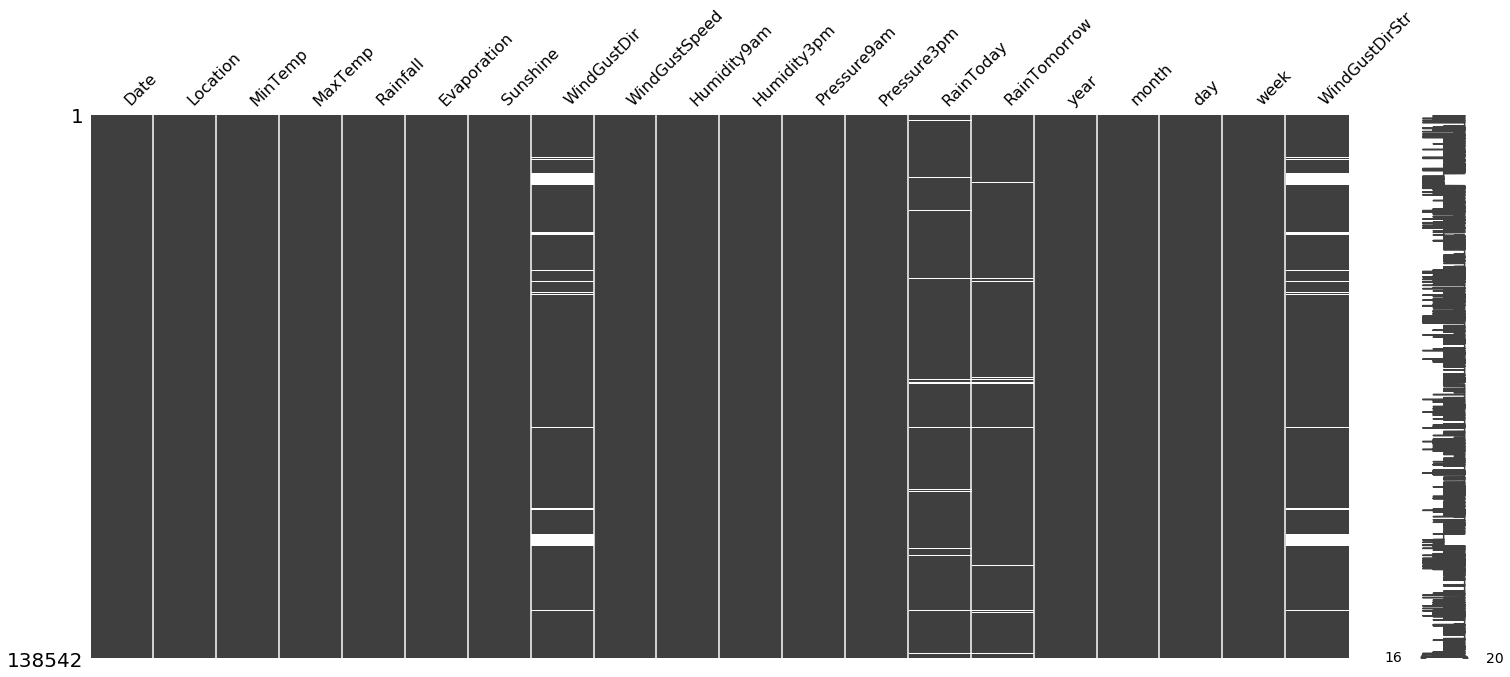

In [183]:
msno.matrix(df);

In [161]:
######################## 

In [184]:
# drop le ligne nan pour RainToday et RainTomorrow

df.dropna(axis=0, how='any', subset=['RainToday','RainTomorrow'], inplace=True)
df.drop(axis=1, columns='WindGustDir', inplace=True)
# colonnes caractérisées par Nan:
# df.isnull().sum()
# WindGustDir     ->  Nan = 8660
# WindGustDirStr  ->  Nan = 8660

df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,year,month,day,week,WindGustDirStr
0,2009-01-01,Albury,11.3,26.5,0.0,9.8,12.9,56.0,46.0,26.0,1004.5,1003.2,No,No,2009,1,1,1,WNW
1,2009-01-02,Albury,9.6,23.9,0.0,11.0,5.9,41.0,44.0,22.0,1014.4,1013.1,No,No,2009,1,2,1,W
2,2009-01-03,Albury,10.5,28.8,0.0,9.0,0.5,26.0,43.0,22.0,1018.7,1014.8,No,No,2009,1,3,1,SSE
3,2009-01-04,Albury,12.3,34.6,0.0,5.4,11.3,37.0,41.0,12.0,1015.1,1010.3,No,No,2009,1,4,1,WNW
4,2009-01-05,Albury,12.9,35.8,0.0,10.0,12.2,41.0,41.0,9.0,1012.6,1009.2,No,No,2009,1,5,2,WNW


In [189]:
# Les valeurs manquantes sont des objets. 
# J'ai construit une fonction pour remplacer les valeurs manquantes 

def replace(X):   
    '''
    the replace function find object types variable
    in a DataFrame and replace them. Specifically 
    the Nans object values with the propagation    
    '''   
    for col in df.select_dtypes('object'):

        X[col] = X[col].fillna(method='ffill') 
                
    return X

df = replace(X=df)

#df.isnull().sum()
# maintenant notre cadre de données est complet 


In [160]:
########################################################

In [169]:
# Première statisique des données 
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,year,month,day,week
count,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000,133963.000000
mean,12.188402,23.202207,2.348719,5.351673,7.525500,40.142547,68.699865,51.434904,1017.816678,1015.435131,2012.815173,6.357128,15.712473,25.943529
std,6.344854,7.054131,8.503735,3.780871,3.824641,13.619548,19.135954,20.851193,7.036255,6.959631,2.488179,3.415930,8.798852,14.933248
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,980.500000,977.100000,2009.000000,1.000000,1.000000,1.000000
25%,7.600000,18.000000,0.000000,2.700000,4.700000,31.000000,57.000000,36.000000,1013.100000,1010.700000,2011.000000,3.000000,8.000000,13.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,70.000000,52.000000,1017.800000,1015.400000,2013.000000,6.000000,16.000000,25.000000
75%,16.800000,28.200000,0.800000,7.200000,10.600000,48.000000,83.000000,66.000000,1022.500000,1020.100000,2015.000000,9.000000,23.000000,39.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,100.000000,100.000000,1041.000000,1038.900000,2017.000000,12.000000,31.000000,53.000000


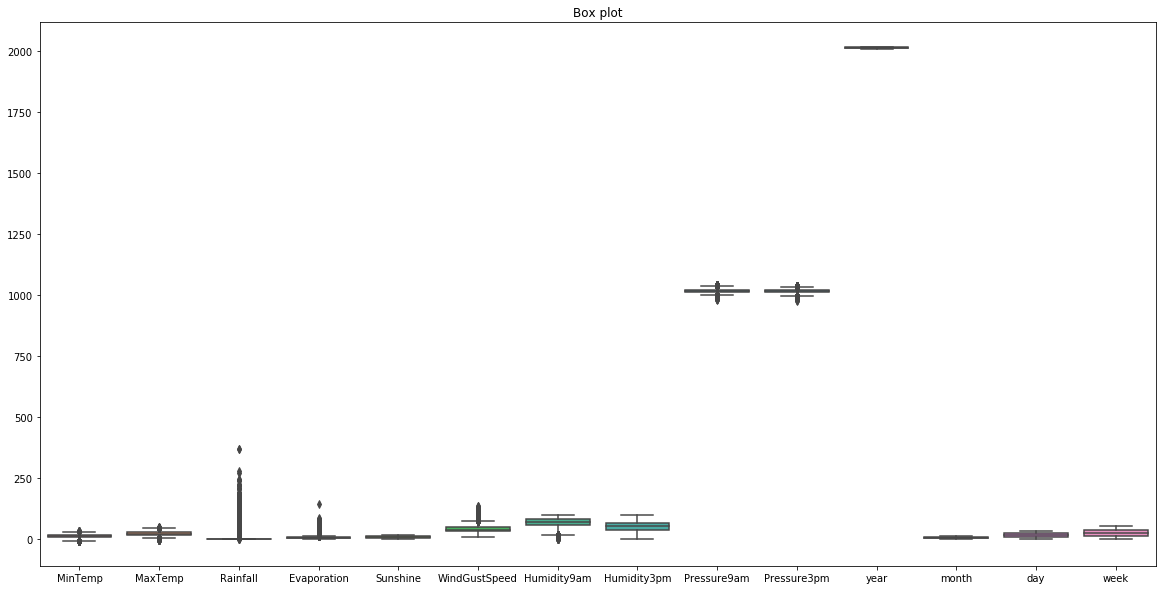

In [170]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.title('Box plot');

In [171]:
# le compte dictionnaire de la région e de la ville     
# VIC -> Victoria
# NSW -> New South Wales
# WAU -> Western Australia 
# TAS -> Tasmania
# SAU -> Sauth Autralia 
# QUE -> Queensland
# NTE -> Northern Territory

region = {'MountGinini':'NSW', 'Newcastle':'NSW', 'Penrith':'NSW', 'SalmonGums':'WAU',
        'Launceston':'TAS', 'Melbourne':'VIC', 'CoffsHarbour':'NSW', 'Canberra':'NSW',
        'BadgerysCreek':'NSW', 'Witchcliffe':'WAU', 'Dartmoor':'VIC', 'Richmond':'NSW',
        'PearceRAAF':'WAU', 'NorahHead':'NSW', 'Cobar':'NSW', 'Walpole':'WAU', 'Ballarat':'VIC',
        'Albany':'WAU', 'Sydney':'NSW', 'Wollongong':'NSW', 'Sale':'VIC', 'Woomera':'SAU',
        'Williamtown':'NSW', 'Tuggeranong':'NSW', 'Portland':'VIC', 'Bendigo':'VIC',
        'Albury':'NSW', 'Nuriootpa':'SAU', 'Brisbane':'QUE', 'Adelaide':'SAU', 'MountGambier':'SAU',
        'Nhil':'VIC', 'Katherine':'NTE', 'Uluru':'NTE', 'SydneyAirport':'NSW', 'AliceSprings':'NTE',
        'NorfolkIsland':'NSW', 'Mildura':'VIC', 'Darwin':'NTE', 'PerthAirport':'WAU', 'Moree':'NSW',
        'GoldCoast':'QUE', 'Hobart':'TAS', 'Perth':'WAU', 'Townsville':'QUE', 'Cairns':'QUE',
        'WaggaWagga':'NSW', 'MelbourneAirport':'VIC', 'Watsonia':'VIC'}


df["Region"] = df["Location"].apply(lambda x: region.get(x))
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,RainToday,RainTomorrow,year,month,day,week,WindGustDirStr,Region
0,2009-01-01,Albury,11.3,26.5,0.0,9.8,12.9,56.0,46.0,26.0,1004.5,1003.2,No,No,2009,1,1,1,WNW,NSW
1,2009-01-02,Albury,9.6,23.9,0.0,11.0,5.9,41.0,44.0,22.0,1014.4,1013.1,No,No,2009,1,2,1,W,NSW
2,2009-01-03,Albury,10.5,28.8,0.0,9.0,0.5,26.0,43.0,22.0,1018.7,1014.8,No,No,2009,1,3,1,SSE,NSW
3,2009-01-04,Albury,12.3,34.6,0.0,5.4,11.3,37.0,41.0,12.0,1015.1,1010.3,No,No,2009,1,4,1,WNW,NSW
4,2009-01-05,Albury,12.9,35.8,0.0,10.0,12.2,41.0,41.0,9.0,1012.6,1009.2,No,No,2009,1,5,2,WNW,NSW


In [172]:
# Nous copions df en tant que 'dfxlocreg' pour représenter 
# graphiquement les données selon les lieux et leurs régions.
dfxlocreg = df.copy(deep=True)
dfxlocreg
dfxlocreg['Location_plus_Region'] = dfxlocreg[['Location', 'Region']].agg(' '.join, axis=1)
dfxlocreg.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,Humidity9am,Humidity3pm,...,Pressure3pm,RainToday,RainTomorrow,year,month,day,week,WindGustDirStr,Region,Location_plus_Region
0,2009-01-01,Albury,11.3,26.5,0.0,9.8,12.9,56.0,46.0,26.0,...,1003.2,No,No,2009,1,1,1,WNW,NSW,Albury NSW
1,2009-01-02,Albury,9.6,23.9,0.0,11.0,5.9,41.0,44.0,22.0,...,1013.1,No,No,2009,1,2,1,W,NSW,Albury NSW
2,2009-01-03,Albury,10.5,28.8,0.0,9.0,0.5,26.0,43.0,22.0,...,1014.8,No,No,2009,1,3,1,SSE,NSW,Albury NSW
3,2009-01-04,Albury,12.3,34.6,0.0,5.4,11.3,37.0,41.0,12.0,...,1010.3,No,No,2009,1,4,1,WNW,NSW,Albury NSW
4,2009-01-05,Albury,12.9,35.8,0.0,10.0,12.2,41.0,41.0,9.0,...,1009.2,No,No,2009,1,5,2,WNW,NSW,Albury NSW


<Figure size 720x360 with 0 Axes>

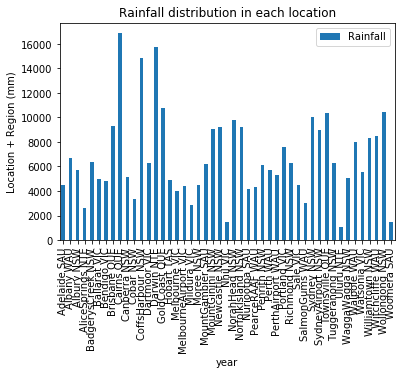

In [173]:
plt.figure(figsize=(10,5))
locregreinfall = dfxlocreg.groupby('Location_plus_Region').agg({'Rainfall':'sum'})
locregreinfall.plot(kind='bar')
plt.title('Rainfall distribution in each location')
plt.xlabel('year')
plt.ylabel('Location + Region (mm)');
locregreinfall['Location_plus_Region'] = locregreinfall.index


# il a plu davantage à Brisbane QUE
# comme on peut le voir sur le graphique, la région la plus pluvieuse est QUE

   +++++++++++++++++++++++++++++++++++++++ top 5 locations  RainFalls +++++++++++++++++++++++++++++++++++++++
   +++++++++++++++++++++++++++++++++++++++ top 5 regions    RainFalls +++++++++++++++++++++++++++++++++++++++


Text(0.5, 0, 'Region')

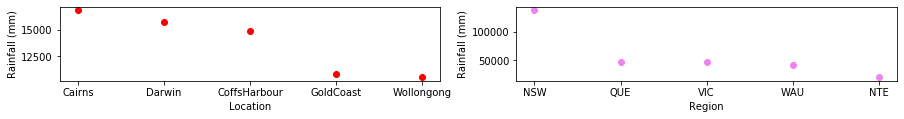

In [174]:
locatifall = dfxlocreg.groupby('Location').agg({'Rainfall':'sum'})
locatifall['Location'] = locatifall.index

regionfall = dfxlocreg.groupby('Region').agg({'Rainfall':'sum'})
regionfall['Region'] = regionfall.index


print ('   +++++++++++++++++++++++++++++++++++++++ top 5 locations  RainFalls +++++++++++++++++++++++++++++++++++++++')
print ('   +++++++++++++++++++++++++++++++++++++++ top 5 regions    RainFalls +++++++++++++++++++++++++++++++++++++++')


plt.figure(figsize=(15,3))

plt.subplot(221)
plt.scatter(y="Rainfall",x= 'Location', data=locatifall.sort_values(by='Rainfall', ascending=False).head(5), c='r')
plt.ylabel('Rainfall (mm)');
plt.xlabel('Location')

plt.subplot(222)
plt.scatter(y="Rainfall",x= 'Region', data=regionfall.sort_values(by='Rainfall', ascending=False).head(5), c='violet')
plt.ylabel('Rainfall (mm)');
plt.xlabel('Region')


   +++++++++++++++++++++++++++++++++++++++ ammount of RainFalls per year  +++++++++++++++++++++++++++++++++++++++
   +++++++++++++++++++++++++++++++++++++++ ammount of RainFalls per month +++++++++++++++++++++++++++++++++++++++


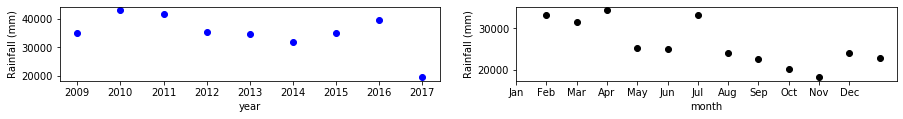

In [175]:
print ('   +++++++++++++++++++++++++++++++++++++++ ammount of RainFalls per year  +++++++++++++++++++++++++++++++++++++++')
print ('   +++++++++++++++++++++++++++++++++++++++ ammount of RainFalls per month +++++++++++++++++++++++++++++++++++++++')


yearsfall = df.groupby('year').agg({'Rainfall':'sum'})
yearsfall['year'] = yearsfall.index


monthfall = dfxlocreg.groupby('month').agg({'Rainfall':'sum'})
monthfall['month'] = monthfall.index

plt.figure(figsize=(15,3))
plt.subplot(221)
plt.scatter(y="Rainfall",x= 'year', data=yearsfall, c='blue')
plt.ylabel('Rainfall (mm)')
plt.xlabel('year');

plt.subplot(222)
plt.scatter(y="Rainfall",x= 'month', data=monthfall, c='black')
plt.ylabel('Rainfall (mm)')
plt.xticks(np.arange(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);
plt.xlabel('month');

# la distribution des précipitations révèle que les années avec les plus fortes précipitations sont :
# 2010, 2011, 2016, la plus faible étant 2017.

# la distribution des précipitations révèle que les months avec les plus fortes précipitations sont :
# Apr. et Jul, la plus faible étant Nov.



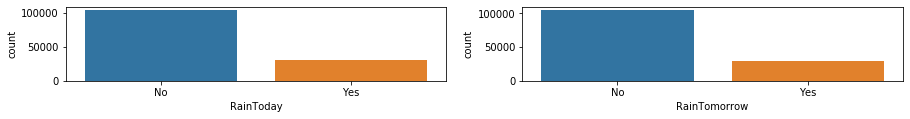

In [176]:
plt.figure(figsize=(15,3))
plt.subplot(221)
sns.countplot(df.RainToday, data=df);

plt.subplot(222)
sns.countplot(df.RainTomorrow, data=df);


   +++++++++++++++++++++++++++++++ ammount of Evaporation in top 5 city per month  ++++++++++++++++++++++++++++++++
   +++++++++++++++++++++++++++++++ ammount of Sunshine in top 5 city per month     ++++++++++++++++++++++++++++++++


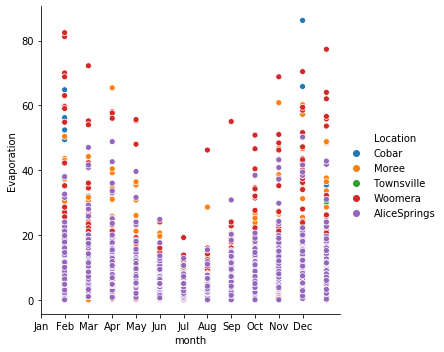

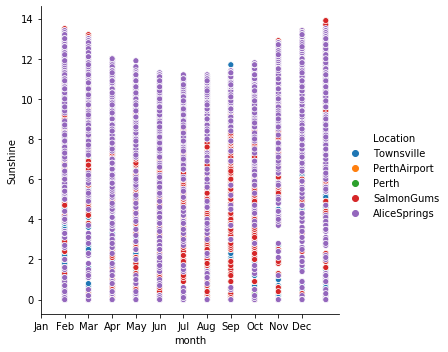

In [177]:
evxloc = df.groupby('Location').agg({'Evaporation':'sum'})
evxloc.sort_values(by='Evaporation',ascending=False).head(5)

sunxloc = df.groupby('Location').agg({'Sunshine':'sum'})
sunxloc.sort_values(by='Sunshine',ascending=False).head(5)

# I plot the top five 
#print (evxloc.sort_values(by='Evaporation',ascending=False).head(5))
#print (sunxloc.sort_values(by='Sunshine',ascending=False).head(5))


print ('   +++++++++++++++++++++++++++++++ ammount of Evaporation in top 5 city per month  ++++++++++++++++++++++++++++++++')
print ('   +++++++++++++++++++++++++++++++ ammount of Sunshine in top 5 city per month     ++++++++++++++++++++++++++++++++')


sns.relplot(x='month', y='Evaporation', data=df[(df['Location']=='Woomera') |
                                             (df['Location']=='AliceSprings') |
                                            (df['Location']=='Townsville')|
                                             (df['Location']=='Moree') |
                                             (df['Location']=='Cobar')],hue='Location');
plt.xticks(np.arange(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);
plt.xlabel('month');


sns.relplot(x='month', y='Sunshine', data=df[(df['Location']=='AliceSprings') |
                                             (df['Location']=='PerthAirport') |
                                             (df['Location']=='Perth')|
                                            (df['Location']=='Townsville') |
                                             (df['Location']=='SalmonGums')],hue='Location');
plt.xticks(np.arange(12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);
plt.xlabel('month');



   +++++++++++++++++++++++++++++++++++++++ Pressure3pm Vs Pressure9am +++++++++++++++++++++++++++++++++++++++


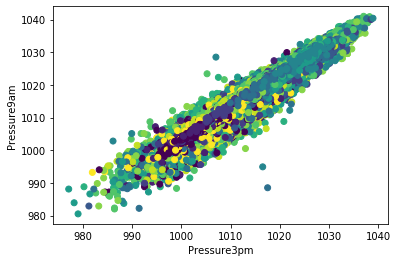

In [190]:
print ('   +++++++++++++++++++++++++++++++++++++++ Pressure3pm Vs Pressure9am +++++++++++++++++++++++++++++++++++++++')

plt.scatter(x='Pressure3pm',
            y='Pressure9am', 
            c='month', 
            data=df)

plt.xlabel('Pressure3pm')
plt.ylabel('Pressure9am');

# existe une relation linéaire entre ces deux variables
